# STAT 201 Project Proposal (Group 27)

## Exploring the Impact of Relationships on Academic Performance

## Introduction
Relationships can often have positive impacts on people's mental and emotional health. This can boost stability and academic support, leading to higher GPAs **(Vaeth, 2009, p.7-8)**. On the other hand, it can also be time consuming and unhealthy, which can detract from a person's studies. This project seeks to answer the question of **whether a student's relationship status affects their academic performance.**

Our [dataset]( https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation) from 2019 contains information on 145 students in the Faculty of Engineering and Faculty of Educational Sciences at the University of California, Irvine. To answer our question, we will infer two parameters (the proportions of students with cumulative GPAs and expected GPAs above 3.0) on the populations of students who are in / not in relationships.

## Preliminary Results

In [2]:
# Libraries required for the proposal
suppressPackageStartupMessages({
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(RColorBrewer)
library(httr)
library(ggplot2)})

In [3]:
student_gpa <- read_csv('https://raw.githubusercontent.com/anjx123/stats201-group-project/Dataset-Refactor/student_prediction.csv', show_col_types = FALSE)
head(student_gpa) # Read first 6 rows data

STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,⋯,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
STUDENT1,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,1,2,1,1,1,1
STUDENT2,2,2,3,3,1,2,2,1,1,⋯,1,1,3,2,3,2,2,3,1,1
STUDENT3,2,2,2,3,2,2,2,2,4,⋯,1,1,2,2,1,1,2,2,1,1
STUDENT4,1,1,1,3,1,2,1,2,1,⋯,1,2,3,2,2,1,3,2,1,1
STUDENT5,2,2,1,3,2,2,1,3,1,⋯,2,1,2,2,2,1,2,2,1,1
STUDENT6,2,2,2,3,2,2,2,2,1,⋯,1,1,1,2,1,2,4,4,1,2


                                                Figure 1: Loaded Student Information 

### Data Wrangling

Figure 1 (above) shows the first 6 students obtained from the dataset which contains different variables such as age, gender, and hours spent on studying. We are only interested in the `PARTNER`, `CUML_GPA`, and `EXP_GPA` columns and so we start by selecting those columns.

In [4]:
partner_data <- student_gpa |>
    select(STUDENTID, PARTNER, CUML_GPA,EXP_GPA) |>
    mutate(PARTNER = recode(PARTNER, '1' = 'Yes', '2' = 'No'))

head(partner_data)

STUDENTID,PARTNER,CUML_GPA,EXP_GPA
<chr>,<chr>,<dbl>,<dbl>
STUDENT1,No,1,1
STUDENT2,No,2,3
STUDENT3,No,2,2
STUDENT4,Yes,3,2
STUDENT5,Yes,2,2
STUDENT6,No,4,4


                    Figure 2: Cleaned Student Data

NOTE: Column: Cumulative GPA means 'Cumulative grade point average in the last semester.' and Expected GPA is the self predicted GPA when they graduate. 1 means the student's cumulative GPA is less than 2.0 (2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 respectively). 

The code as shown in Figure 3 below shows the counts of students with and without a partner. This will be important to show that we can apply the Central Limit Theorem later. 

In [7]:
partner_data |> summarize(PartnerCount = sum(PARTNER == "Yes"),      # With partner
                          NoPartnerCount = sum(PARTNER == "No"))     # Without partner

PartnerCount,NoPartnerCount
<int>,<int>
61,84


                    Figure 3: Count of students with partners and without partners

### Proportion of Students with a Cumulative and Expected GPA above 3.0

In this study, we are interested in the proportion of students who have good academic performance. We can then group these students by whether they have a partner or not, and calculate the proportion of individuals that have a cumulative and expected GPA greater than or equal to level 4 (GPA >= 3.00) which we will deem as "successful" in this project.

In [9]:
prop_gpas <- partner_data |>
    group_by(PARTNER) |>
    summarize(count = n(),
              p_gpa_above_3.0 = sum(CUML_GPA >= 4)/count,
              p_expect_gpa_above_3.0 = sum(EXP_GPA >= 4)/count)

    
head(prop_gpas)

PARTNER,count,p_gpa_above_3.0,p_expect_gpa_above_3.0
<chr>,<int>,<dbl>,<dbl>
No,84,0.4404762,0.1904762
Yes,61,0.4590164,0.2295082


            Figure 4: Proportion of students' Cumulative GPA and Expected GPA above 3.0

According to Figure 4, we found that the students with partners have slightly higher proportions of Cumulative and Expected GPA above 3.0, than that of students without partners. 

### Visualization: Proportion of Students with a Cumulative GPA above 3.0

In order to compare the student performance with the factor `PARTNER`, we visualize the distribution of the cumulative GPA separately, for students with Partners and without Partners. Figure 5a and 5b shows the cumulative GPA for students who have a partner and the culumulative GPA for students who do not have a partner respectively.

Because our project statistics is the proportion for student GPA level 4.0 and greater (GPA >= 3.00), we color in the parts we are interested in, inspecting if one group of students have higher proportion in the distribution.


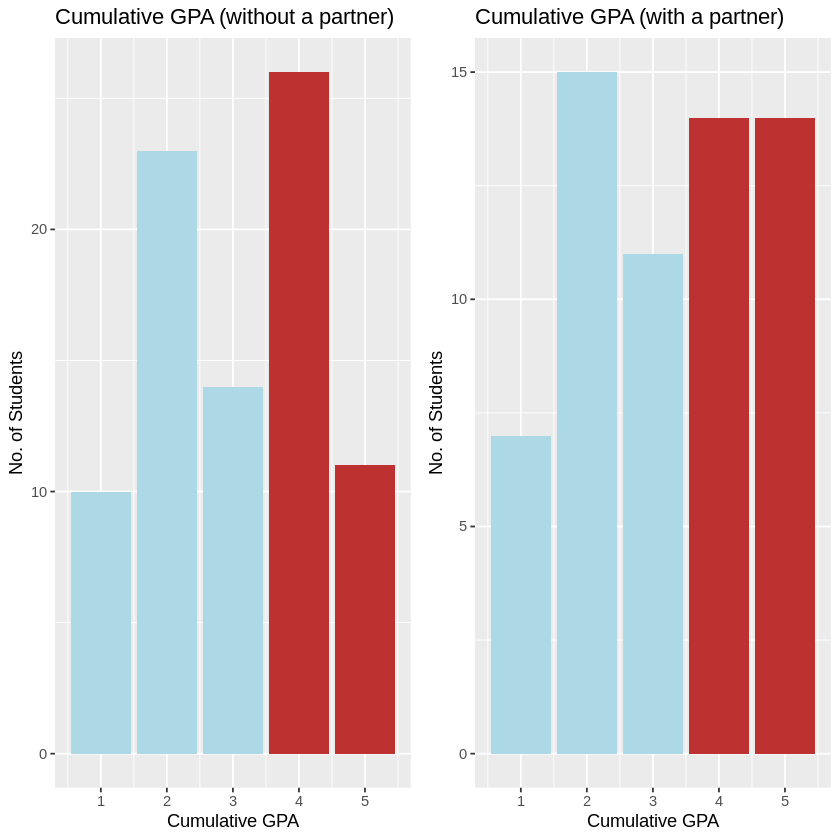

In [15]:
partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Cumulative GPA", title = "Cumulative GPA (with a partner)", y = "No. of Students")

no_partner_stu_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(CUML_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = CUML_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Cumulative GPA", title = "Cumulative GPA (without a partner)", y = "No. of Students") #+


plot_grid(no_partner_stu_gpa_plot, partner_stu_gpa_plot)

                            Figure 5a & Figure 5b: Sample Distribution of Cumulative GPA

### Visualization: Proportion of Students with an Expected GPA above 3.0

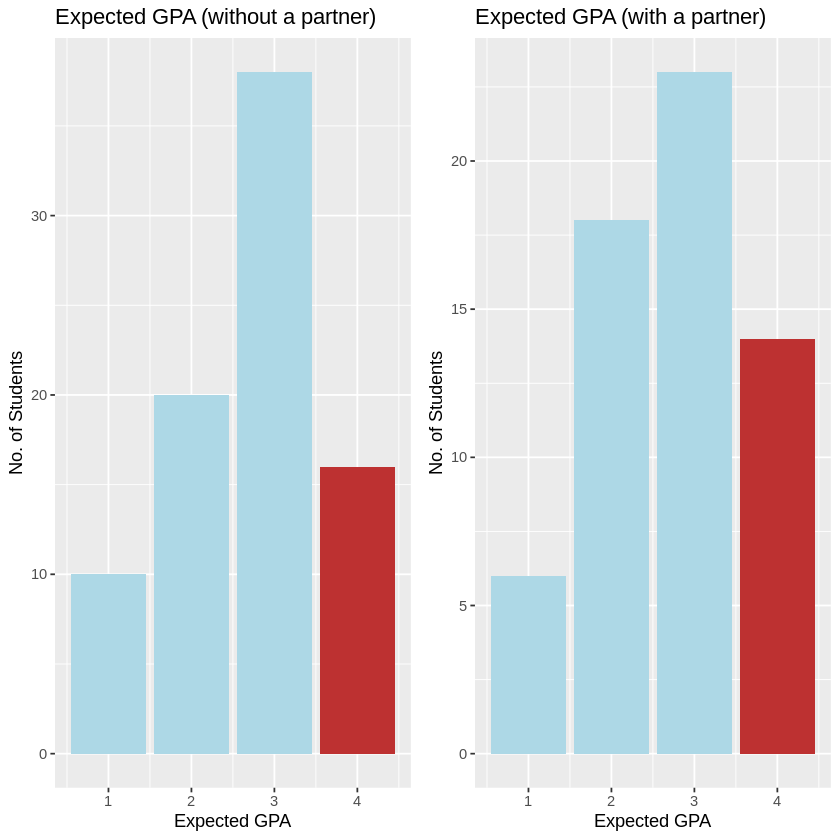

In [14]:
partner_stu_expect_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(EXP_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "Yes")|>
    ggplot(aes(x =EXP_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Expected GPA", title = "Expected GPA (with a partner)", y = "No. of Students")

no_partner_stu_expect_gpa_plot <- partner_data |>
    mutate(bar_color = ifelse(EXP_GPA %in% c(4, 5), "#bd3131", "#ADD8E6")) |>
    filter(PARTNER == "No")|>
    ggplot(aes(x = EXP_GPA, fill = bar_color))+
    geom_bar() +
    scale_fill_identity() +
    labs(x = "Expected GPA", title = "Expected GPA (without a partner)", y = "No. of Students") #+


plot_grid(no_partner_stu_expect_gpa_plot, partner_stu_expect_gpa_plot)

            Figure 6a & Figure 6b: Sample Distribution of Expected GPA

## Methods: Plan
This report is trustworthy as it uses robust statistical frameworks to analyze the data. The hypothesis testing approach which includes bootstrapping to obtain confidence intervals ensures that the conclusions drawn are statistically significant and not due to random chance. In addition, the report uses data collected by a reputable source UCI's Faculty of Engineering and Faculty of Educational Sciences students which gives credit that the sample was taken without bias and representative of the population.

From our preliminary analysis, we see that students with a partner have a higher mean cumulative and expected GPA in the sample than students who do not. However, this would not be sufficient evidence to provide to a stakeholder and declare that having a partner is better for student's GPA. This is because plots do not tell us whether the observed differences are statistically significant as they do not provide a confidence interval to show us how precise our estimates are. Therefore, there’s a risk of drawing inaccurate conclusions due to the inherent randomness of sampling. 

### Our plan moving forward
To address these gaps, we will conduct a hypothesis test using the infer package. The framework will be roughly as such
```r  
dataset |> specify |> hypothesize_with_independence |> generate_using_permute |> calculate_the_diff_in_mean |> get_ci |> Graph the bootstrap distribution and confidence interval
``` 
Then we will use `
get_p_value()
`
with direction set to both sides to get the p_value and compare it to a chosen significance level to see whether we should reject the null hypothesis. 

Bootstrapping to obtain the confidence interval (CI) results in fewer assumptions on the data and can be simply obtained by using `get_ci` in the infer package. 
Asymptotics relies on the Central Limit Theorem (CLT) which relies on having a sufficiently sized data set that is not heavily skewed. In this case, It would be alright to use the asymptotic method as the dataset is sufficiently large (counts 84 for no partner and 64 for yes partner), and the difference in mean being a sum of values from the population. 

### What we expect to find

We expect to find that there will be a correlation between being in a relationship and a student's GPA as students in relationships may have more academic, emotional support that could boost mental health and stability leading to higher GPAs **(Vaeth, 2009, p.7-8)**. This is especially when relationship are steady, consequently relationships can be a distraction from studies and lead to a lower GPA when it is unhealthy. 

### Impact

These findings can help other students make an informed decision of about entering or maintaining relationships during their studies. In addition, it could lead to new strategies for schools to support students such as relationship counseling or workshops on balancing personal life with academic responsibilities. **(Lin S. Norton , S. Thomas , K. Morgan , A. Tilley & Thomas E. Dickins (1998))**

### Further Questions
What specific aspects of a relationship affect a student's GPA? Is it the emotional support, the time commitment, or some other factor? Perhaps we can also explore how different types of relationships (short-term, long-term etc.) have an effect on GPA.

## References
1. Csafrit. (2021, December 21). Higher Education Students Performance Evaluation. Kaggle. https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation 

2. Norton, L. S., Thomas, S., Morgan, K., Tilley, A., &amp; Dickins, T. E. (1998). Full-time studying and long-term relationships: Make or break for mature students? British Journal of Guidance &amp;amp; Counselling, 26(1), 75–88. https://doi.org/10.1080/03069889808253840 

3. Vaeth , J. (2009). Undergraduate Psychology Research Methods Journal - Lindenwood University. https://digitalcommons.lindenwood.edu/cgi/viewcontent.cgi?article=1140&amp;context=psych_journals 